In [1]:
!git config --global user.name "V_Hlinina"
!git config --global user.email "wydenwyden@google.com"

In [30]:
!git clone https://github.com/wydenok/FD.git

Cloning into 'FD'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [32]:
!mv FD_draft.ipynb FD/

mv: cannot stat 'FD_draft.ipynb': No such file or directory


In [33]:
!pwd

/content


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
%cd /content/drive/MyDrive/Colab_Notebooks/FD_draft.ipynb>

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab_Notebooks/FD_draft.ipynb>'
/content


In [2]:
from google.colab import files
files.upload()  # Choose the kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wydenx","key":"bc79ac031d02c2f26c9b6395b802b96b"}'}

In [3]:
# set up Kaggle API

# Move the kaggle.json file to the appropriate directory

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
import os
print(os.listdir())

['.config', 'kaggle.json', 'sample_data']


In [5]:
!file kaggle.json

kaggle.json: JSON data


In [6]:
!ls -R kaggle.json

kaggle.json


In [7]:
!kaggle datasets list

ref                                                      title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
anandshaw2001/netflix-movies-and-tv-shows                Netflix Movies and TV Shows                  1MB  2025-01-03 10:33:01           3628        101  1.0              
ankushpanday1/stroke-predictions-dataset-of-indians      Stroke Predictions: Dataset of Indians       3MB  2025-01-12 10:49:00            864         26  1.0              
beridzeg45/world-university-rankings                     World University Rankings                  166KB  2025-01-15 10:50:30            866         24  1.0              
preetigupta004/cancer-issue                              Cancer issue                               297KB  2025-01-11 09:57:24           115

In [8]:
!kaggle datasets download -d <kartik2112/fraud-detection>


/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `kaggle datasets download -d <kartik2112/fraud-detection>'


In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kartik2112/fraud-detection")

print("Path to dataset files:", path)

100%|██████████| 202M/202M [00:02<00:00, 97.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kartik2112/fraud-detection/versions/1


In [10]:
# List all files in the dataset directory
files = os.listdir(path)
print("Files in the dataset:", files)

Files in the dataset: ['fraudTest.csv', 'fraudTrain.csv']


In [11]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# expand the output to display all columns at once

pd.set_option('display.max_columns', 100)

df_train = pd.read_csv(os.path.join(path,'fraudTrain.csv'))
display(df_train.head())


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [13]:
df_test = pd.read_csv(os.path.join(path,'fraudTest.csv'))
display(df_test.head())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


Data dictionary:

    `index` - Unique Identifier for each row
    `trans_date_trans_time` - Transaction DateTime
    `cc_num` - Credit Card Number of Customer
    `merchant` - Merchant Name
    `category` - Category of Merchant
    `amt` - Amount of Transaction
    `first` - First Name of Credit Card Holder
    `last` - Last Name of Credit Card Holder
    `gender` - Gender of Credit Card Holder
    `street` - Street Address of Credit Card Holder
    `city` - City of Credit Card Holder
    `state` - State of Credit Card Holder
    `zip` - Zip of Credit Card Holder
    `lat` - Latitude Location of Credit Card Holder
    `long` - Longitude Location of Credit Card Holder
    `city_pop` - Credit Card Holder's City Population
    `job` - Job of Credit Card Holder
    `dob` - Date of Birth of Credit Card Holder
    `trans_num` - Transaction Number
    `unix_time` - UNIX Time of transaction
    `merch_lat` - Latitude Location of Merchant
    `merch_long` - Longitude Location of Merchant
    `is_fraud` - Fraud Flag <--- Target Class


In [14]:
print(df_train.shape)
print(df_test.shape)

(1296675, 23)
(555719, 23)


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [16]:
pd.crosstab(df_train['is_fraud'], columns='count', normalize=True)

# highly unbalanced data

col_0,count
is_fraud,
0,0.994211
1,0.005789


In [17]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [18]:
# check nans in a more clear way
print('Shape of df_train:', df_train.shape)
print(df_train.isna().sum())

print('Shape of df_test:', df_test.shape)
print(df_test.isna().sum())

Shape of df_train: (1296675, 23)
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
Shape of df_test: (555719, 23)
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [20]:
# check objects
object_cols = ['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state',
               'job', 'dob', 'trans_num']

for col in object_cols:
    print('\nunique values: {}'.format(df_train.loc[:, col].unique()))
    print('value counts: \n{}'.format(df_train.loc[:, col].value_counts()))


unique values: ['2019-01-01 00:00:18' '2019-01-01 00:00:44' '2019-01-01 00:00:51' ...
 '2020-06-21 12:12:32' '2020-06-21 12:13:36' '2020-06-21 12:13:37']
value counts: 
trans_date_trans_time
2019-04-22 16:02:01    4
2020-06-01 01:37:47    4
2020-06-02 12:47:07    4
2019-11-18 23:03:49    3
2019-12-01 14:11:58    3
                      ..
2019-07-13 18:38:18    1
2019-07-13 18:37:26    1
2019-07-13 18:35:46    1
2019-07-13 18:35:41    1
2020-06-21 12:13:37    1
Name: count, Length: 1274791, dtype: int64

unique values: ['fraud_Rippin, Kub and Mann' 'fraud_Heller, Gutmann and Zieme'
 'fraud_Lind-Buckridge' 'fraud_Kutch, Hermiston and Farrell'
 'fraud_Keeling-Crist' 'fraud_Stroman, Hudson and Erdman'
 'fraud_Rowe-Vandervort' 'fraud_Corwin-Collins' 'fraud_Herzog Ltd'
 'fraud_Schoen, Kuphal and Nitzsche' 'fraud_Rutherford-Mertz'
 'fraud_Kerluke-Abshire' 'fraud_Lockman Ltd' 'fraud_Kiehn Inc'
 'fraud_Beier-Hyatt' 'fraud_Schmidt and Sons' 'fraud_Lebsack and Sons'
 'fraud_Mayert Group' 'fraud

In [21]:
#investigating the range of different unique values possible for each variable.
df_train.nunique()

,0
Unnamed: 0,1296675
trans_date_trans_time,1274791
cc_num,983
merchant,693
category,14
amt,52928
first,352
last,481
gender,2
street,983


In [22]:
# check duplicates
print('Duplicated rows:', df_train.duplicated().sum())

Duplicated rows: 0


In [23]:
# separate numeric columns in DataFrame

numeric_cols = df_train.select_dtypes(include=['number']).columns.tolist()
col_to_exclude = ['is_fraud']
numeric_cols = [col for col in numeric_cols if col not in col_to_exclude]

<ipython-input-24-9edae5edb72f>:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout();


<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


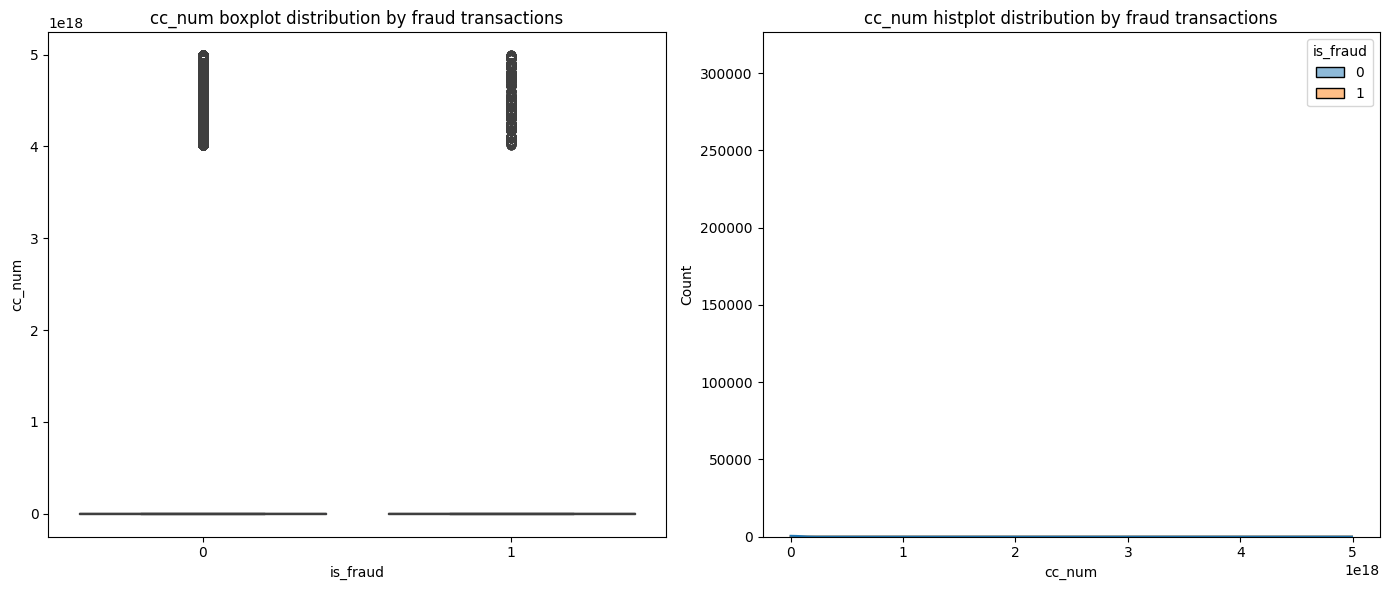

<ipython-input-24-9edae5edb72f>:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout();


<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


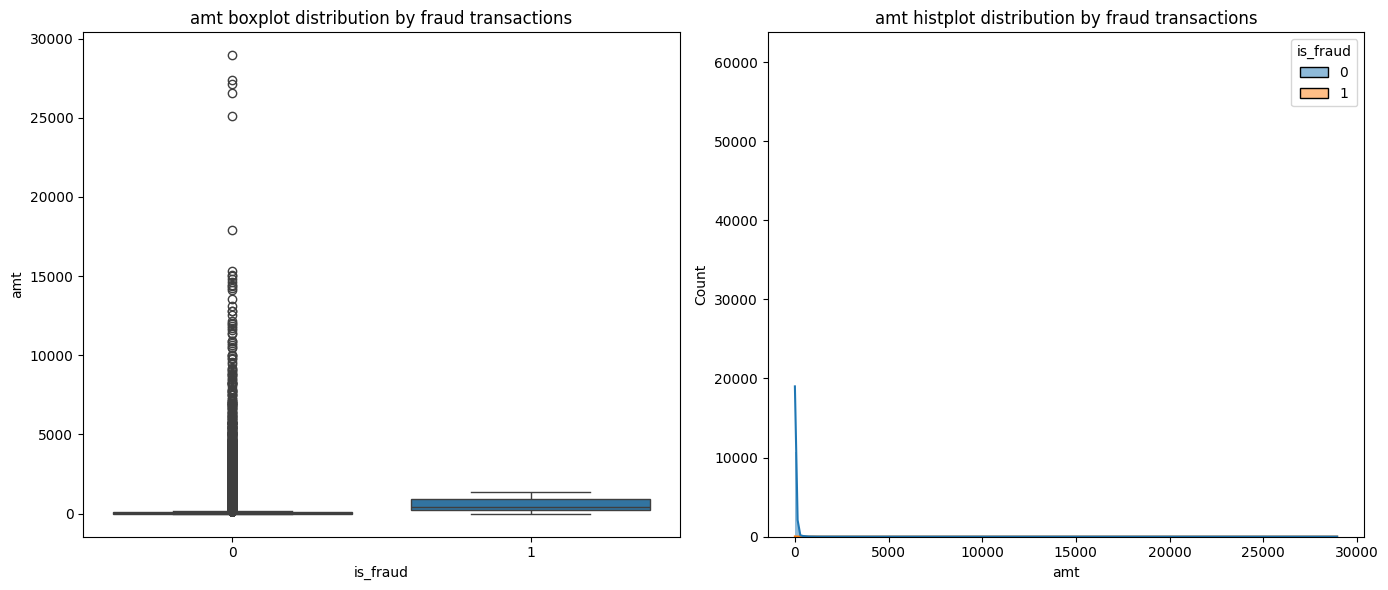

<Figure size 640x480 with 0 Axes>

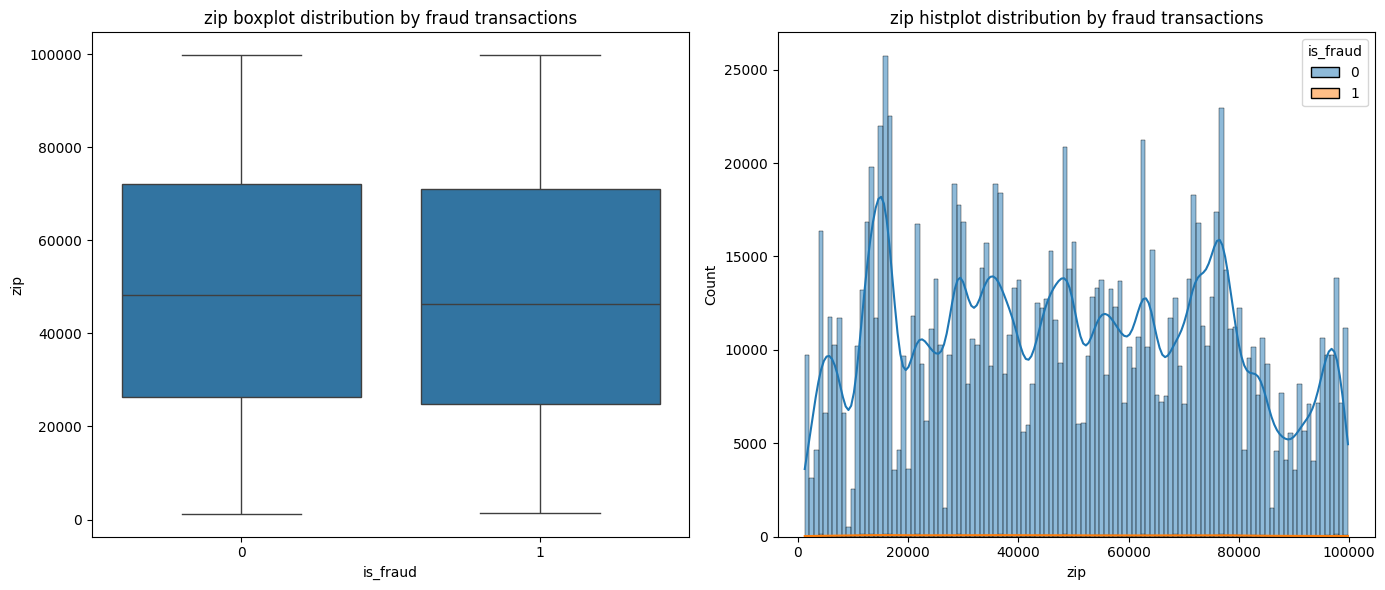

<Figure size 640x480 with 0 Axes>

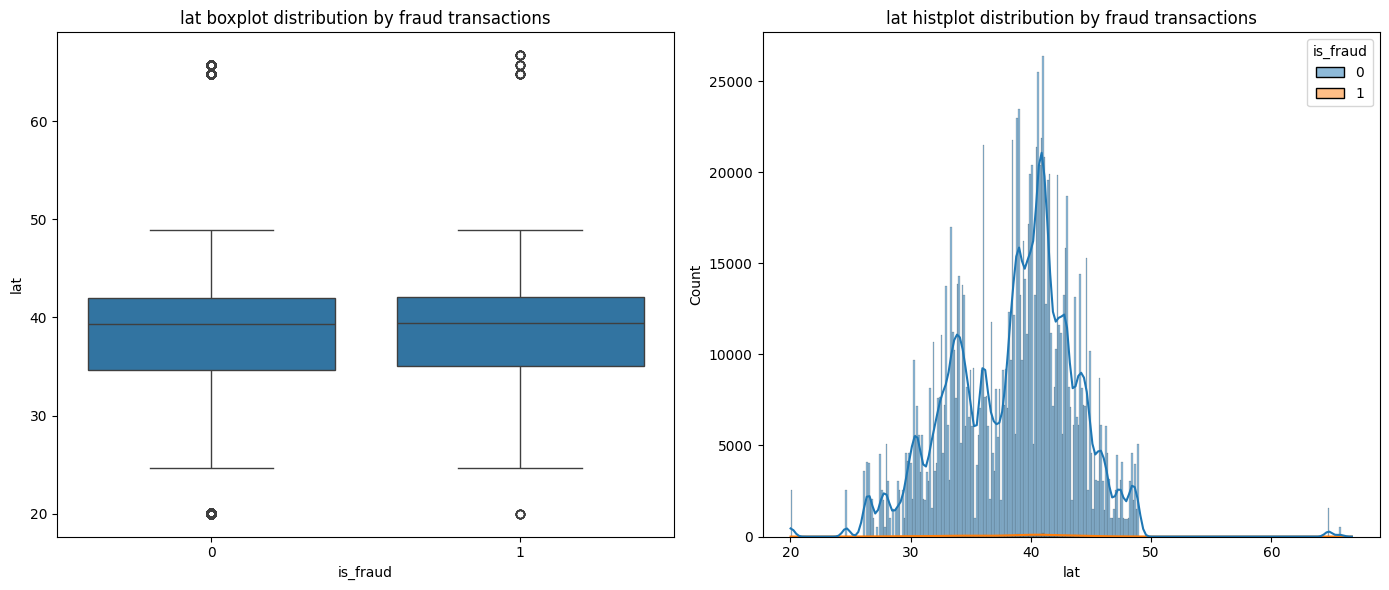

<Figure size 640x480 with 0 Axes>

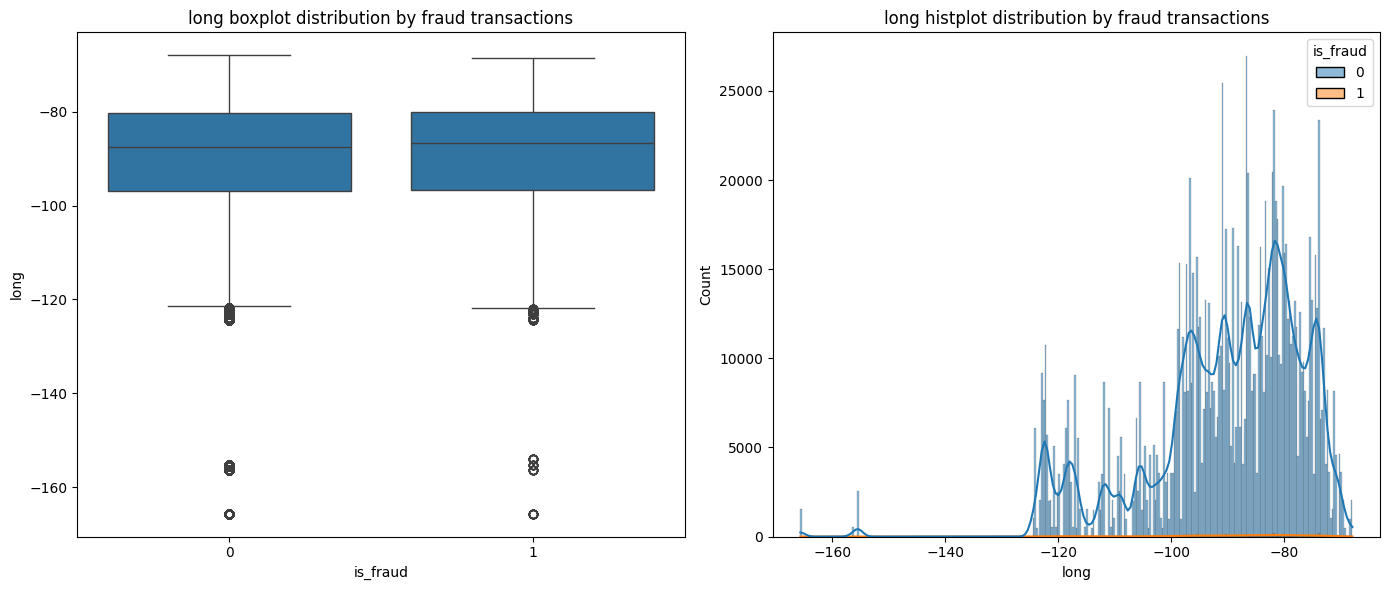

<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


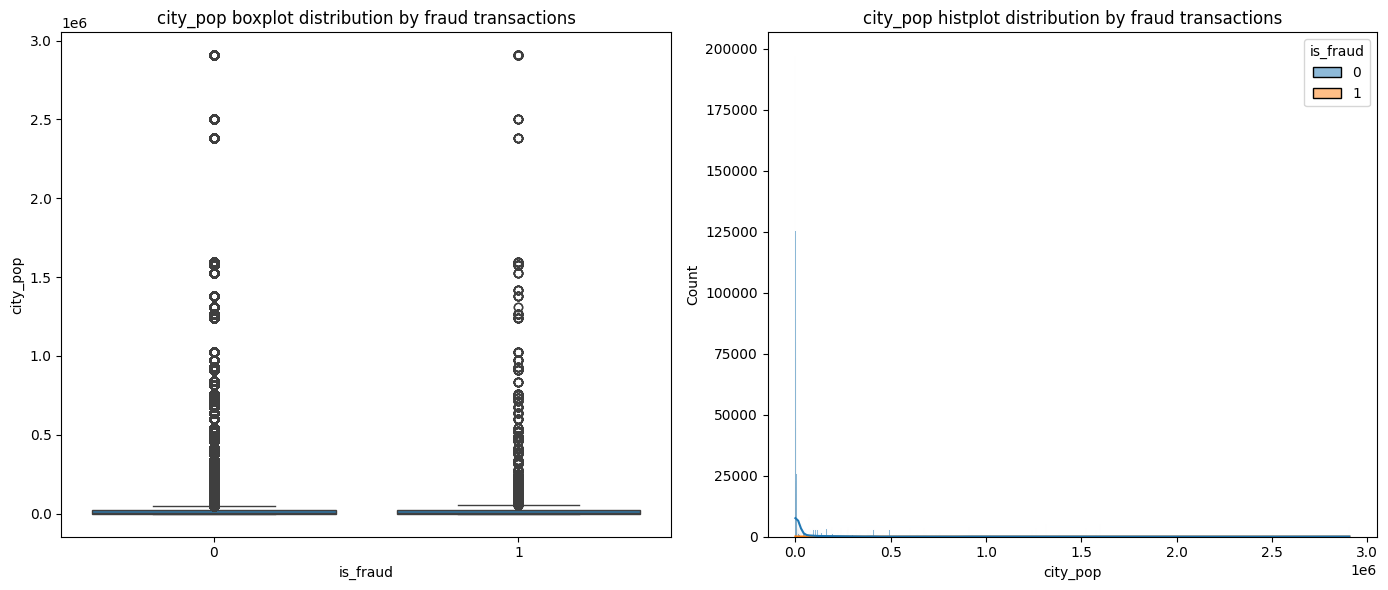

<Figure size 640x480 with 0 Axes>

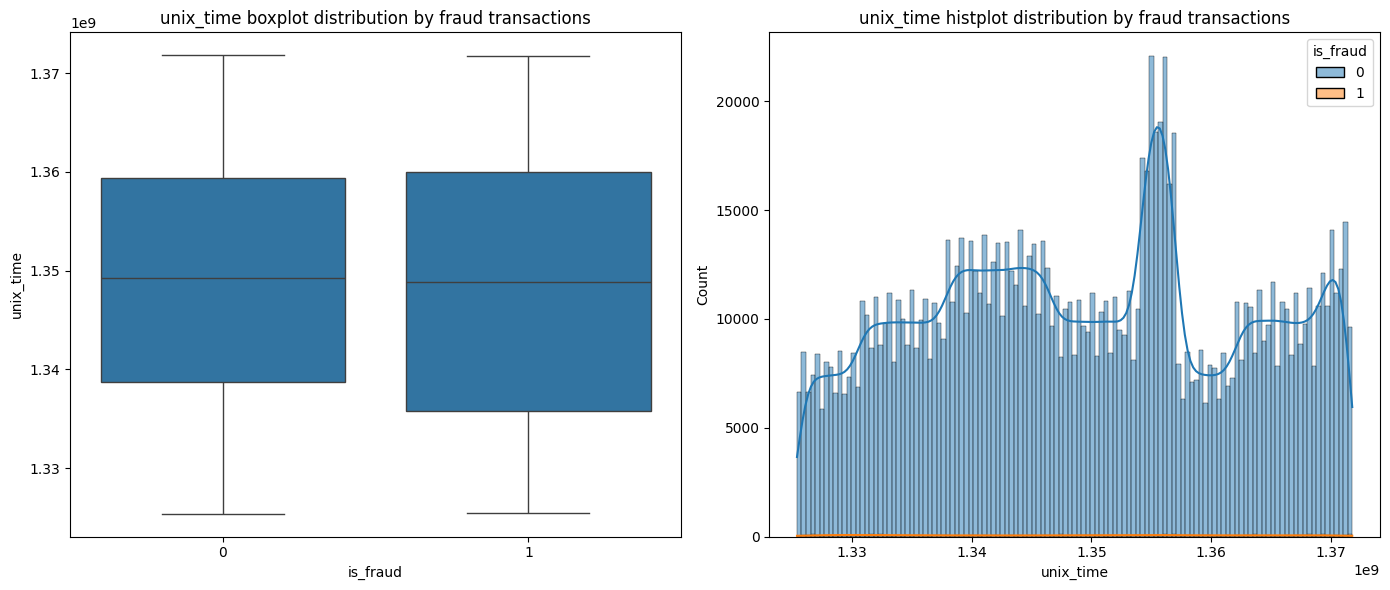

<Figure size 640x480 with 0 Axes>

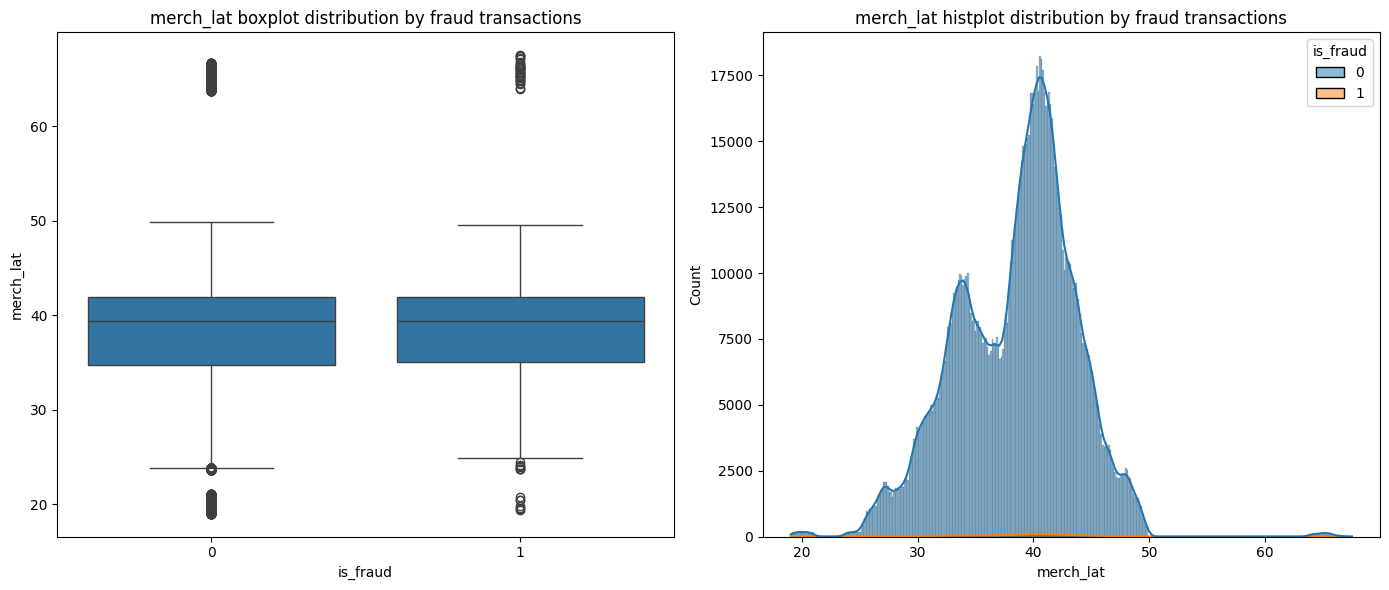

<Figure size 640x480 with 0 Axes>

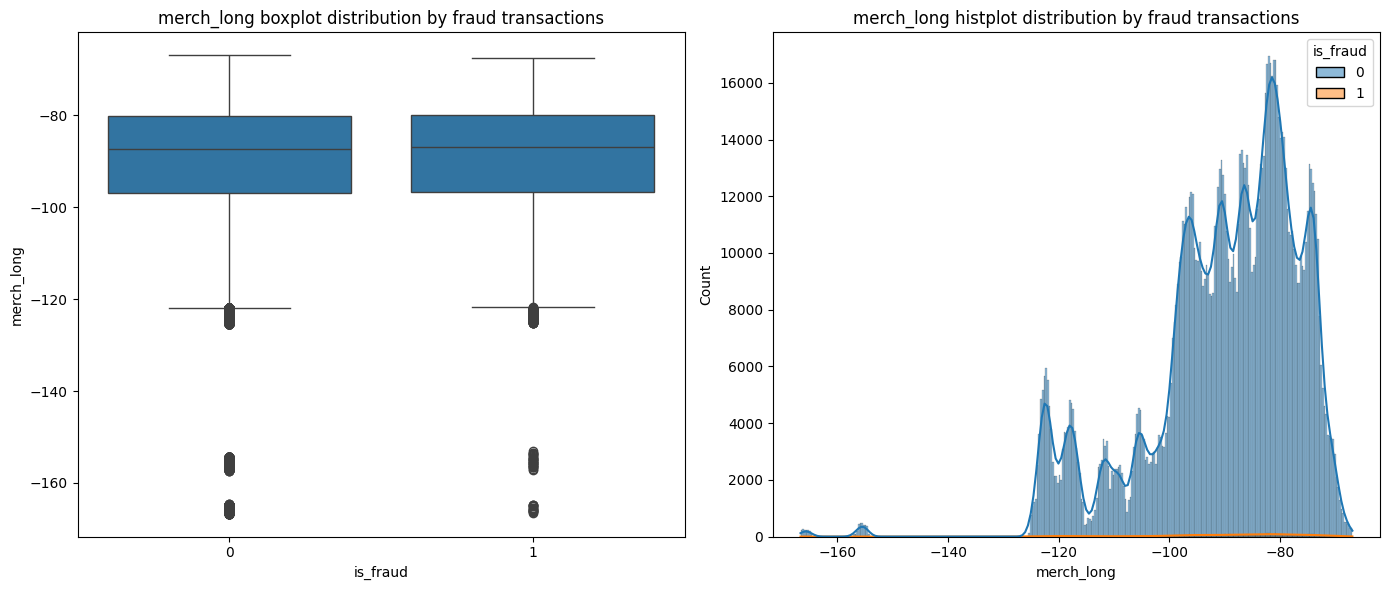

In [24]:
#  see how numeric data is distributed and check for outliers

for i in numeric_cols[1:]:
    plt.figure()
    fig, ax = plt.subplots(figsize=(14,6),
                           nrows=1, ncols=2)

    sns.boxplot(y=i, x='is_fraud', data=df_train, ax=ax[0])
    sns.histplot(data=df_train, x=i, hue='is_fraud', kde=True, ax=ax[1])

    ax[0].set_title(f'{i} boxplot distribution by fraud transactions', fontsize=12)
    ax[1].set_title(f'{i} histplot distribution by fraud transactions', fontsize=12)

    fig.tight_layout();
    plt.show()

In [ ]:
sns.pairplot(df_train[numeric_cols[:-1]])


Output hidden; open in https://colab.research.google.com to view.

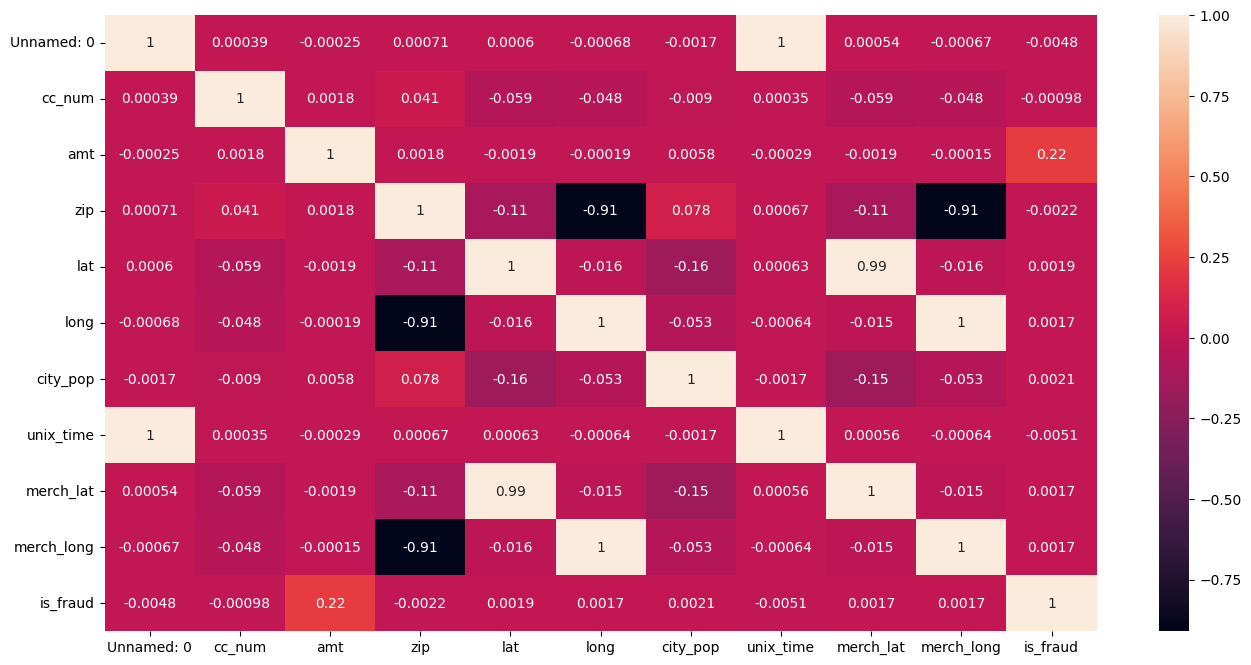

In [25]:
# See which features are correlated using heatmap

numeric_df = df_train.select_dtypes(include=['float64', 'int64'])

fig, ax = plt.subplots(figsize=[16,8])
sns.heatmap(numeric_df.corr(), annot=True, ax=ax);

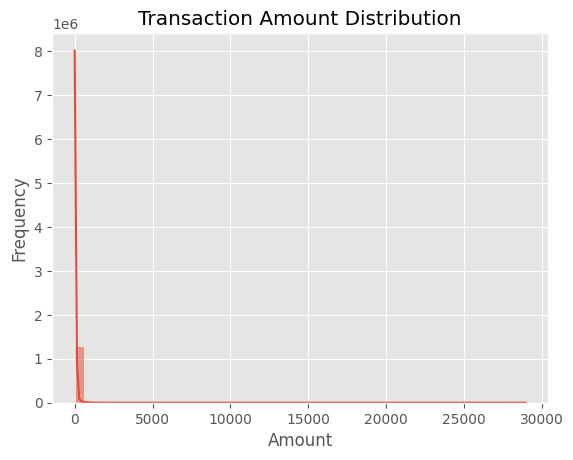

In [26]:
plt.style.use('ggplot')
sns.histplot(df_train['amt'], kde=True, bins=50)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

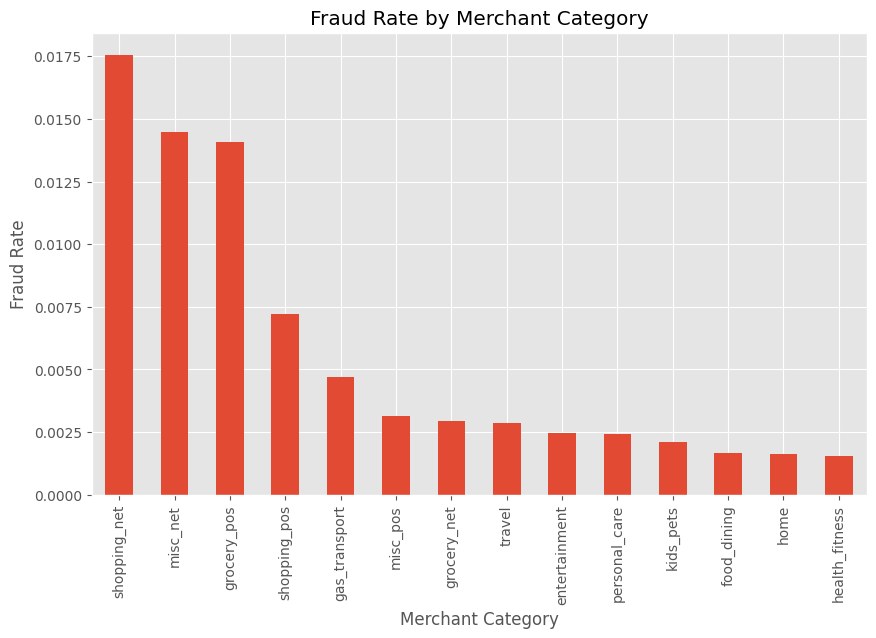

In [27]:
fraud_rate_by_category = df_train.groupby('category')['is_fraud'].mean().sort_values(ascending=False)

fraud_rate_by_category.plot(kind='bar', figsize=(10, 6))
plt.title('Fraud Rate by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Fraud Rate')
plt.show()

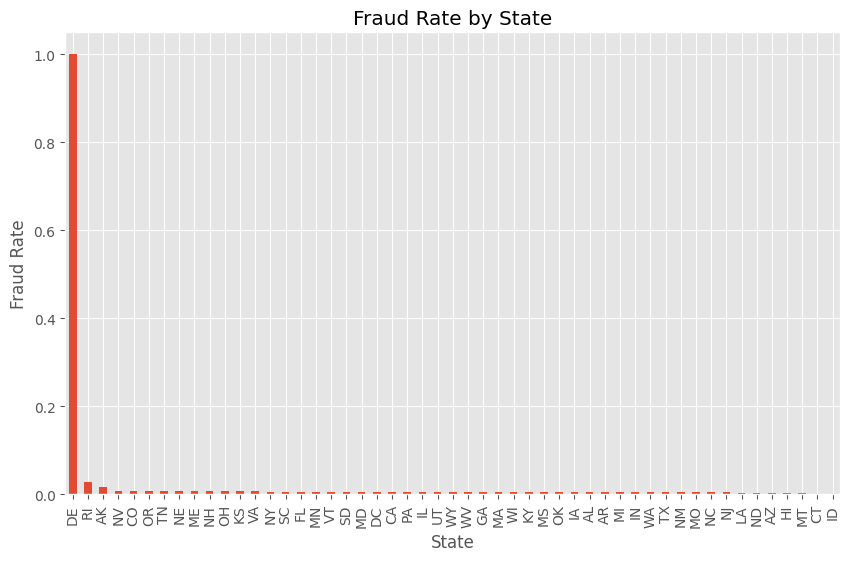

In [28]:
fraud_rate_by_state = df_train.groupby('state')['is_fraud'].mean().sort_values(ascending=False)

fraud_rate_by_state.plot(kind='bar', figsize=(10, 6))
plt.title('Fraud Rate by State')
plt.xlabel('State')
plt.ylabel('Fraud Rate')
plt.show()